# Load all necessary packages

Code required to run more RAM in Google Colab.
I accessed Colab adn Drive through Google Chrome Browser as this improved performance over Safari browser.

In [2]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Fri Sep  8 11:18:42 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 54.8 gigabytes of available RAM

You are using a high-RAM runtime!


In [4]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.12.0


In [5]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Activation, Dropout, Flatten, MaxPooling2D, BatchNormalization

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing Data

Data has been uploaded into Google Drive as zip archive files, code below unwraps the files into the content directory on Google Colab.

Data has been split on 500 GB RAM Linux machine as follows - 70% training data (33K images), 10% validation (1-2K images) and 20% testing dataset.
Data has been obtained from the following dataset on Kaggle: https://www.kaggle.com/datasets/madibokishev/doges-77-breeds


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
!unzip "/content/drive/MyDrive/dog_images/val.zip" -d "/content"

Streaming output truncated to the last 5000 lines.
  inflating: /content/val/shetland_sheepdog/shetland_sheepdog_230.png  
  inflating: /content/__MACOSX/val/shetland_sheepdog/._shetland_sheepdog_230.png  
  inflating: /content/val/shetland_sheepdog/shetland_sheepdog_2602.png  
  inflating: /content/__MACOSX/val/shetland_sheepdog/._shetland_sheepdog_2602.png  
  inflating: /content/val/shetland_sheepdog/shetland_sheepdog_2663.png  
  inflating: /content/__MACOSX/val/shetland_sheepdog/._shetland_sheepdog_2663.png  
  inflating: /content/val/shetland_sheepdog/shetland_sheepdog_2710.png  
  inflating: /content/__MACOSX/val/shetland_sheepdog/._shetland_sheepdog_2710.png  
  inflating: /content/val/shetland_sheepdog/shetland_sheepdog_2775.png  
  inflating: /content/__MACOSX/val/shetland_sheepdog/._shetland_sheepdog_2775.png  
  inflating: /content/val/shetland_sheepdog/shetland_sheepdog_2777.png  
  inflating: /content/__MACOSX/val/shetland_sheepdog/._shetland_sheepdog_2777.png  
  inflati

In [9]:
!unzip "/content/drive/MyDrive/dog_images/test.zip" -d "/content"

Streaming output truncated to the last 5000 lines.
  inflating: /content/test/english_springer/english_springer_818.png  
  inflating: /content/__MACOSX/test/english_springer/._english_springer_818.png  
  inflating: /content/test/english_springer/english_springer_821.png  
  inflating: /content/__MACOSX/test/english_springer/._english_springer_821.png  
  inflating: /content/test/english_springer/english_springer_823.png  
  inflating: /content/__MACOSX/test/english_springer/._english_springer_823.png  
  inflating: /content/test/english_springer/english_springer_826.png  
  inflating: /content/__MACOSX/test/english_springer/._english_springer_826.png  
  inflating: /content/test/english_springer/english_springer_941.png  
  inflating: /content/__MACOSX/test/english_springer/._english_springer_941.png  
  inflating: /content/test/english_springer/english_springer_982.png  
  inflating: /content/__MACOSX/test/english_springer/._english_springer_982.png  
  inflating: /content/test/engl

In [10]:
!unzip "/content/drive/MyDrive/dog_images/train.zip" -d "/content"

Streaming output truncated to the last 5000 lines.
  inflating: /content/train/papillon/papillon_2278.png  
  inflating: /content/__MACOSX/train/papillon/._papillon_2278.png  
  inflating: /content/train/papillon/papillon_2284.png  
  inflating: /content/__MACOSX/train/papillon/._papillon_2284.png  
  inflating: /content/train/papillon/papillon_2285.png  
  inflating: /content/__MACOSX/train/papillon/._papillon_2285.png  
  inflating: /content/train/papillon/papillon_232.png  
  inflating: /content/__MACOSX/train/papillon/._papillon_232.png  
  inflating: /content/train/papillon/papillon_2320.png  
  inflating: /content/__MACOSX/train/papillon/._papillon_2320.png  
  inflating: /content/train/papillon/papillon_2326.png  
  inflating: /content/__MACOSX/train/papillon/._papillon_2326.png  
  inflating: /content/train/papillon/papillon_235.png  
  inflating: /content/__MACOSX/train/papillon/._papillon_235.png  
  inflating: /content/train/papillon/papillon_2354.png  
  inflating: /content

In [11]:
import shutil

Setting path, plotting some of the images and testing everything works ok with retrieving files.

In [12]:
test_path = '/content/test'
train_path = '/content/train'
val_path = '/content/val'

In [ ]:
test_path

'/content/test'

In [13]:
import os

In [ ]:
os.listdir(val_path)

['alabai',
 'bishon_frise',
 'caucasian_shepherd',
 'west_highland_white_terrier',
 'beagle',
 'american_staffordshire_terrier',
 'basset',
 'toy_terrier',
 'borzoi',
 'tibetan_mastiff',
 'german_pointer',
 'pomeranian',
 'weimaraner',
 'basenji',
 'bernese_mountain_dog',
 'boxer',
 'rottweiler',
 'miniature_schnauzer',
 'komondor',
 'doberman',
 'saint_bernard',
 'maltese',
 'samoyed',
 'malamute',
 'wolfhound',
 'foxhound',
 'boston_terrier',
 'vizsla',
 'old_english_sheepdog',
 'english_springer',
 'malinois',
 'labrador_retriever',
 'jack_russel_terrier',
 'whippet',
 'rhodesian_ridgeback',
 'airedale',
 'papillon',
 'english_setter',
 'shetland_sheepdog',
 'cane_corso',
 'bullterrier',
 'border_collie',
 'irish_setter',
 'giant_schnauzer',
 'saluki',
 'great_dane',
 'chow_chow',
 'shiba',
 'siberian_husky',
 'golden_retriever',
 'appenzeller',
 'poodle',
 'scotch_terrier',
 'chihuahua',
 'pug',
 'cocker_spaniel',
 'tibetan_terrier',
 'greater_swiss_mountain_dog',
 'akita',
 'britt

In [ ]:
os.listdir(test_path)

['alabai',
 'bishon_frise',
 'caucasian_shepherd',
 'west_highland_white_terrier',
 'beagle',
 'american_staffordshire_terrier',
 'basset',
 'toy_terrier',
 'borzoi',
 'tibetan_mastiff',
 'german_pointer',
 'pomeranian',
 'weimaraner',
 'basenji',
 'bernese_mountain_dog',
 'boxer',
 'rottweiler',
 'miniature_schnauzer',
 'komondor',
 'doberman',
 'saint_bernard',
 'maltese',
 'samoyed',
 'malamute',
 'wolfhound',
 'foxhound',
 'boston_terrier',
 'vizsla',
 'old_english_sheepdog',
 'english_springer',
 'malinois',
 'labrador_retriever',
 'jack_russel_terrier',
 'whippet',
 'rhodesian_ridgeback',
 'airedale',
 'papillon',
 'english_setter',
 'shetland_sheepdog',
 'cane_corso',
 'bullterrier',
 'border_collie',
 'irish_setter',
 'giant_schnauzer',
 'saluki',
 'great_dane',
 'chow_chow',
 'shiba',
 'siberian_husky',
 'golden_retriever',
 'appenzeller',
 'poodle',
 'scotch_terrier',
 'chihuahua',
 'pug',
 'cocker_spaniel',
 'tibetan_terrier',
 'greater_swiss_mountain_dog',
 'akita',
 'britt

In [ ]:
os.listdir(train_path)

['alabai',
 'bishon_frise',
 'caucasian_shepherd',
 'west_highland_white_terrier',
 'beagle',
 'american_staffordshire_terrier',
 'basset',
 'toy_terrier',
 'borzoi',
 'tibetan_mastiff',
 'german_pointer',
 'pomeranian',
 'weimaraner',
 'basenji',
 'bernese_mountain_dog',
 'boxer',
 'rottweiler',
 'miniature_schnauzer',
 'komondor',
 'doberman',
 'saint_bernard',
 'maltese',
 'samoyed',
 'malamute',
 'wolfhound',
 'foxhound',
 'boston_terrier',
 'vizsla',
 'old_english_sheepdog',
 'english_springer',
 'malinois',
 'labrador_retriever',
 'jack_russel_terrier',
 'whippet',
 'rhodesian_ridgeback',
 'airedale',
 'papillon',
 'english_setter',
 'shetland_sheepdog',
 'cane_corso',
 'bullterrier',
 'border_collie',
 'irish_setter',
 'giant_schnauzer',
 'saluki',
 'great_dane',
 'chow_chow',
 'shiba',
 'siberian_husky',
 'golden_retriever',
 'appenzeller',
 'poodle',
 'scotch_terrier',
 'chihuahua',
 'pug',
 'cocker_spaniel',
 'tibetan_terrier',
 'greater_swiss_mountain_dog',
 'akita',
 'britt

In [ ]:
os.listdir(train_path+'/labrador_retriever/')[0]

'labrador_retriever_5467.png'

In [ ]:
os.listdir(test_path + '/beagle/')[0]

'beagle_3847.png'

In [ ]:
len(os.listdir(train_path+'/labrador_retriever/'))
len(os.listdir(test_path+'/labrador_retriever'))

253

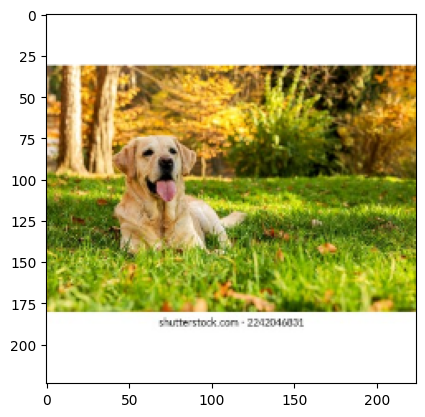

In [ ]:
lab_im_path = train_path+'/labrador_retriever/'+os.listdir(train_path+'/labrador_retriever/')[0]
lab = plt.imread(lab_im_path)
plt.imshow(lab)

In [ ]:
lab.shape

(224, 224, 3)

In [ ]:
lab

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)

In [ ]:
lab.max()

1.0

In [ ]:
lab.min()

0.0

In [ ]:
lab.mean()

0.61243993

In [ ]:
lab.std()

0.35149276

Storing image shape into a variable so that it will be easier to modify the model later.

In [14]:
image_shape = (244, 244, 3)

Edditing images to sort of increase number of images available for training by rotating, filling in, zooming in at existing images.
Also normalized images by division by 255.

In [15]:
from keras.preprocessing.image import ImageDataGenerator

In [16]:
image_gen = ImageDataGenerator(rotation_range=30, # rotate the image 30 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

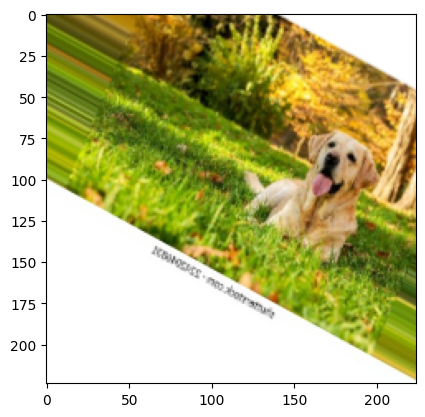

In [ ]:
plt.imshow(image_gen.random_transform(lab))

Checking if number of classes is the same for all datasets.

In [17]:
image_gen.flow_from_directory(train_path)

Found 30481 images belonging to 60 classes.


In [18]:
image_gen.flow_from_directory(test_path)

Found 8725 images belonging to 60 classes.


In [19]:
image_gen.flow_from_directory(val_path)

Found 4347 images belonging to 60 classes.


### Writing the model
Model is a modified version of VGG16 model, VGG16 classified images of size 224 x 224 pixels.
I have added more neurons to the model, so that they would be able to process my images that are slightly larger more easily (244 x244 pixels).

In [43]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=image_shape))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=image_shape))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(BatchNormalization())


model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=image_shape))
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=image_shape))
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=image_shape))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(BatchNormalization())


model.add(Conv2D(256, kernel_size=(3,3), activation='relu', input_shape=image_shape))
model.add(Conv2D(256, kernel_size=(3,3), activation='relu', input_shape=image_shape))
model.add(Conv2D(256, kernel_size=(3,3), activation='relu', input_shape=image_shape))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(BatchNormalization())


model.add(Conv2D(512, kernel_size=(3,3), activation='relu', input_shape=image_shape))
model.add(Conv2D(512, kernel_size=(3,3), activation='relu', input_shape=image_shape))
model.add(Conv2D(512, kernel_size=(3,3), activation='relu', input_shape=image_shape))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(BatchNormalization())



model.add(Conv2D(768, kernel_size=(3,3), activation='relu', input_shape=image_shape))
model.add(Conv2D(768, kernel_size=(3,3), activation='relu', input_shape=image_shape))
model.add(Conv2D(768, kernel_size=(3,3), activation='relu', input_shape=image_shape))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(BatchNormalization())


model.add(Flatten())

model.add(Dense(256, activation='relu'))
# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

model.add(Dense(150, activation='relu'))
model.add(Dropout(0.5))

#final layer is Dense with activation mode softmax as we have 60 classes
model.add(Dense(60, activation='softmax'))

In [21]:
from keras.optimizers import Adam, RMSprop
from keras.losses import CategoricalCrossentropy

In [44]:
model.compile(optimizer='adam',loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [45]:
#summary of the model
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_67 (Conv2D)          (None, 242, 242, 64)      1792      
                                                                 
 conv2d_68 (Conv2D)          (None, 240, 240, 64)      36928     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 120, 120, 64)     0         
 g2D)                                                            
                                                                 
 batch_normalization_25 (Bat  (None, 120, 120, 64)     256       
 chNormalization)                                                
                                                                 
 conv2d_69 (Conv2D)          (None, 118, 118, 128)     73856     
                                                                 
 conv2d_70 (Conv2D)          (None, 116, 116, 128)    

In [24]:
from keras.callbacks import EarlyStopping

In [46]:
early_stop = EarlyStopping(monitor='val_loss', patience=5)

In [26]:
batch_size = 32

### Feeding images into the Image Generator and Model

In [27]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                                shuffle=True,
                                               class_mode='categorical')

Found 30481 images belonging to 60 classes.


In [28]:
val_image_gen = image_gen.flow_from_directory(val_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                                shuffle=True,
                                               class_mode='categorical')

Found 4347 images belonging to 60 classes.


In [29]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical')

Found 8725 images belonging to 60 classes.


In [ ]:
train_image_gen.class_indices

{'airedale': 0,
 'akita': 1,
 'alabai': 2,
 'american_staffordshire_terrier': 3,
 'appenzeller': 4,
 'basenji': 5,
 'basset': 6,
 'beagle': 7,
 'bernese_mountain_dog': 8,
 'bishon_frise': 9,
 'border_collie': 10,
 'borzoi': 11,
 'boston_terrier': 12,
 'boxer': 13,
 'brittany_spaniel': 14,
 'bullterrier': 15,
 'cane_corso': 16,
 'caucasian_shepherd': 17,
 'chihuahua': 18,
 'chow_chow': 19,
 'cocker_spaniel': 20,
 'doberman': 21,
 'english_setter': 22,
 'english_springer': 23,
 'foxhound': 24,
 'german_pointer': 25,
 'giant_schnauzer': 26,
 'golden_retriever': 27,
 'great_dane': 28,
 'greater_swiss_mountain_dog': 29,
 'irish_setter': 30,
 'jack_russel_terrier': 31,
 'komondor': 32,
 'labrador_retriever': 33,
 'malamute': 34,
 'malinois': 35,
 'maltese': 36,
 'miniature_schnauzer': 37,
 'old_english_sheepdog': 38,
 'papillon': 39,
 'pomeranian': 40,
 'poodle': 41,
 'pug': 42,
 'rhodesian_ridgeback': 43,
 'rottweiler': 44,
 'saint_bernard': 45,
 'saluki': 46,
 'samoyed': 47,
 'scotch_terri

Wanted to use Adam optimizer over RMSprop as it has better accuracy but it did not work with t

In [30]:
import warnings
warnings.filterwarnings('ignore')

### Training the model

In [47]:
history = model.fit(train_image_gen, epochs=50,
                              validation_data=val_image_gen,
                             callbacks=[early_stop])

Epoch 1/50
953/953 [==============================] - 552s 554ms/step - loss: 4.0071 - accuracy: 0.0433 - val_loss: 3.8777 - val_accuracy: 0.0531
Epoch 2/50
953/953 [==============================] - 518s 544ms/step - loss: 3.9005 - accuracy: 0.0516 - val_loss: 3.8596 - val_accuracy: 0.0566
Epoch 3/50
953/953 [==============================] - 521s 546ms/step - loss: 3.8592 - accuracy: 0.0542 - val_loss: 3.8107 - val_accuracy: 0.0667
Epoch 4/50
953/953 [==============================] - 521s 546ms/step - loss: 3.8216 - accuracy: 0.0601 - val_loss: 3.8172 - val_accuracy: 0.0566
Epoch 5/50
144/953 [===>..........................] - ETA: 6:38 - loss: 3.8134 - accuracy: 0.0532

KeyboardInterrupt: ignored

Feed model with batches of 32 images, could have feed more, but this would mean that the model would have to process more images at the same time.
I have also tried batches of 60 and 100 images, however this didn't improve model accuracy and loss.
Had run model for 50 epochs, but accuracy only increased to 20%, which means that the model cannot learn the patterns of the images.
I don't think that a model should run for more than 60 epochs, as that would mean it's not very efficient when it comes to learning the patterns of the images.

In [ ]:
from keras.models import load_model

In [ ]:
model.save('dogbreed_classifier_ver2_GoogleColab.h5')

### Evaluating Model Performance

In [ ]:
pred = model.predict(test_image_gen)

273/273 [==============================] - 119s 436ms/step


In [ ]:
acc = history.history['accuracy']

val_acc = history.history['val_accuracy']

loss = history.history['loss']

val_loss = history.history['val_loss']

epochs = range(len(acc))

NameError: ignored

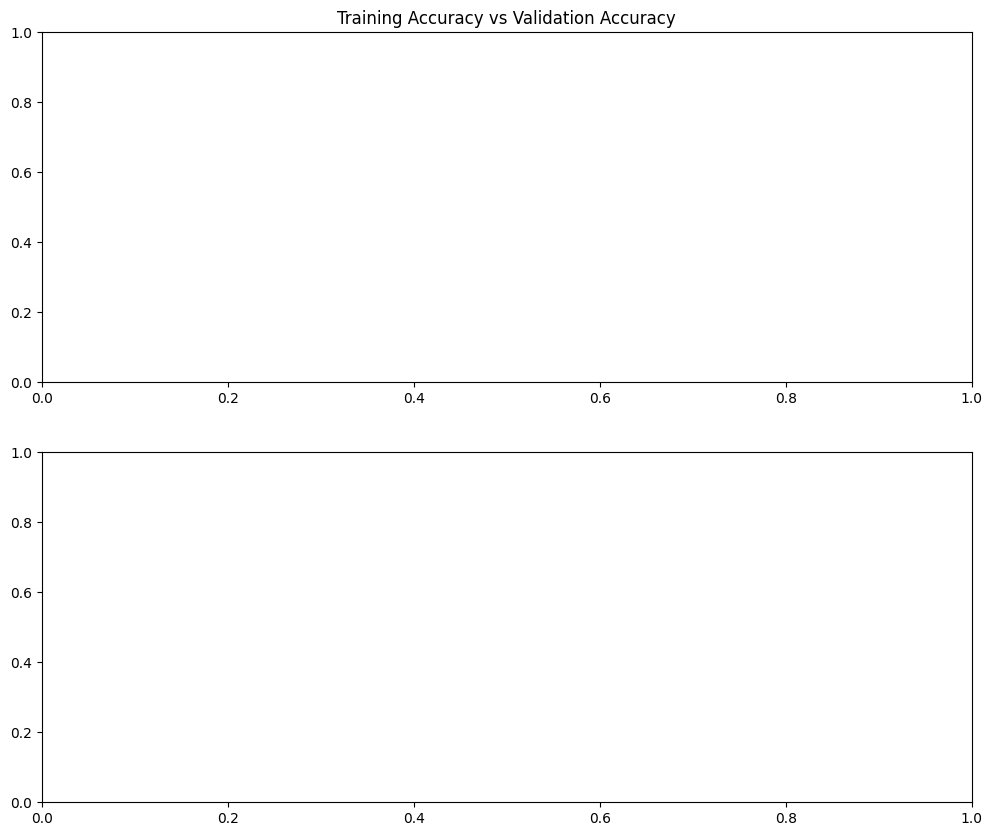

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].plot(acc, 'o-', label='Train Accuracy')
ax[0].plot(val_acc, 'o', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training Loss vs Validation Loss')
ax[1].plot(loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')


plt.tight_layout()
plt.show()

In [1]:
model.evaluate_generator(test_image_gen)

NameError: ignored

In [ ]:
test_loss, test_accuracy = model.evaluate(test_image_gen, batch_size=32)

In [ ]:
print(f"Test Loss:     {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

In [ ]:
pred_probabilities = model.predict(test_image_gen)

In [ ]:
pred_probabilities

In [ ]:
test_image_gen.classes

In [ ]:
predictions = pred_probabilities > 0.5

In [ ]:
predictions

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
y_pred = np.argmax(pred, axis=1)
y_true = test_image_gen.classes

In [ ]:
print(confusion_matrix(y_true, y_pred))

In [ ]:
cf_mtx = confusion_matrix(y_true, y_pred)

group_counts = ["{0:0.0f}".format(value) for value in cf_mtx.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_mtx.flatten()/np.sum(cf_mtx)]
box_labels = [f"{v1}\n({v2})" for v1, v2 in zip(group_counts, group_percentages)]
box_labels = np.asarray(box_labels).reshape(6, 6)

plt.figure(figsize = (12, 10))
sns.heatmap(cf_mtx, xticklabels=labels.values(), yticklabels=labels.values(),
           cmap="YlGnBu", fmt="", annot=box_labels)
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.show()

In [ ]:
labels = {value: key for key, value in train_image_gen.class_indices.items()}

In [ ]:
print(classification_report(y_true, y_pred, target_names=labels.values()))

In [ ]:
confusion_matrix(test_image_gen.classes,pred_probabilities)

In [ ]:
my_lab_dir = '/content/labrador_retriever_pred.png'

In [ ]:
from keras.preprocessing.image import load_img

In [ ]:
lab_im_path = my_lab
my_lab = plt.imread(lab_im_path)
plt.imshow(my_lab)

In [ ]:
my_lab.shape

In [ ]:
from PIL import Image
from numpy import asarray

In [ ]:
from keras.preprocessing.image import load_img

In [ ]:
test_image = load_img(my_lab_dir, color_mode='rgb')

In [ ]:
test_image

In [ ]:
numpydata = asarray(test_image)

In [ ]:
numpydata.shape

In [ ]:
my_image_arr = np.expand_dims(numpydata, axis=0)

In [ ]:
my_image_arr.shape

In [ ]:
my_image_arr = my_image_arr/255

In [ ]:
my_image_arr

In [ ]:
model.predict(my_image_arr)

In [ ]:
(model.predict(my_image_arr > 0.5))

In [ ]:
score = tf.nn.softmax(model.predict(my_image_arr))

In [ ]:
score

In [ ]:
np.argmax(score)

In [ ]:
print(test_image_gen.class_indices)